In [122]:
# -*- coding: utf-8 -*-
"""

"""

# 导入相关库
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# 导入数据
#data = pd.read_csv("南方先行一周 null.csv")
#data = pd.read_csv("南方.csv")
#data = pd.read_csv("南方先行两周.csv")
#data = pd.read_csv("南方先行同步.csv")
#data = pd.read_csv("南方同步监测.csv")
data = pd.read_csv("南方同步预测 null.csv")
#data = pd.read_csv("南方先行.csv")

#data = pd.read_csv("北方先行一周.csv")
#data = pd.read_csv("北方.csv")
#data = pd.read_csv("北方先行两周.csv")
#data = pd.read_csv("北方先行同步.csv")
#data = pd.read_csv("北方同步监测.csv")
#data = pd.read_csv("北方同步预测.csv")
#data = pd.read_csv("北方先行.csv")

#使用均值对空缺值进行填充
for i in range(data.shape[1]): #shape[1]代表列数
    data.iloc[:,i] = data.iloc[:,i].fillna(data.iloc[:,i].mean())

chushu = data.shape[1]-1 #输出列的位置
data_x = data .iloc[:,0:chushu]#选择训练输入数据
data_y = data .iloc[:,chushu]#选择训练输出数据


from sklearn.model_selection import train_test_split#通过train_test_split划分数据集
train_x, test_x, train_y, test_y = train_test_split(data_x,data_y,test_size=0.2,random_state=11)#测试样本比例为0.2

#对输入特征进行归一化
from sklearn import preprocessing
mm_1 = preprocessing.MinMaxScaler(feature_range=(0,1))
train_x = mm_1.fit_transform(train_x)

from sklearn import preprocessing
mm_3 = preprocessing.MinMaxScaler(feature_range=(0,1))
test_x = mm_3.fit_transform(test_x)

print("训练输入数据维度：",train_x.shape)
print("训练输出数据维度：",train_y.shape)
print("测试输入数据维度：",test_x.shape)
print("测试输出数据维度：",test_y.shape)


训练输入数据维度： (385, 7)
训练输出数据维度： (385,)
测试输入数据维度： (97, 7)
测试输出数据维度： (97,)


In [123]:
import warnings
warnings.filterwarnings("ignore")

def mape(y_true,y_pre):
    true=y_true[y_true!=0]
    pre=y_pre[y_true!=0]
    mape_ = np.mean(np.abs((pre-true)/true))
    return mape_

best_score =1000

#利用循环找最佳参数
for i in range(10,500):
    print(i)
    for j in [0.001,0.01,0.05,0.1,0.2,0.3]:
        hidden_layer_sizes=[i]
        learning_rate_init=j
        model=MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, learning_rate='constant',learning_rate_init=learning_rate_init, verbose=0)
        model.fit(train_x,train_y) 
        pred_y = model.predict(test_x)
        pred_y= np.array(pred_y).reshape(-1,1)
        from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
        r2_score = r2_score(test_y,pred_y)
        mse=mean_squared_error(test_y,pred_y)
        rmse = np.sqrt(mean_squared_error(test_y,pred_y))
        print("测试的mse",mse)
        if mse < best_score:
            best_score = mse
            best_parameters = {'hidden_layer_sizes':hidden_layer_sizes,
                                'learning_rate_init':learning_rate_init}
print('best score:{:.2f}'.format(best_score)) 
print('best parameters:{}'.format(best_parameters))
        

10
测试的mse 0.5396133539221518
测试的mse 0.234189083593752
测试的mse 0.1886177292559495
测试的mse 0.19726908903306226
测试的mse 0.20798524538162966
测试的mse 0.2500806868023092
11
测试的mse 0.9078469710367453
测试的mse 0.27638603800160005
测试的mse 0.24147614892565478
测试的mse 0.20229112866611337
测试的mse 0.19761097639260972
测试的mse 0.22460311215359266
12
测试的mse 1.0254282614481836
测试的mse 0.2069839981269926
测试的mse 0.1874811184904165
测试的mse 0.20623926613873023
测试的mse 0.2028838875202756
测试的mse 0.21466000719950185
13
测试的mse 0.7226642827126779
测试的mse 0.1965710837015313
测试的mse 0.1968457415622751
测试的mse 0.1977351732071954
测试的mse 0.2100198968806849
测试的mse 0.237871457298791
14
测试的mse 0.39961001599539325
测试的mse 0.19832051636840842
测试的mse 0.20665909429300292
测试的mse 0.2097122525231986
测试的mse 0.23100024982531728
测试的mse 0.21424057020984
15
测试的mse 0.5527538508322242
测试的mse 0.2626979449048413
测试的mse 0.20870335124568254
测试的mse 0.20240716369000114
测试的mse 0.2044620694367559
测试的mse 0.21017810688374083
16
测试的mse 0.8241139296032558
测试的ms

测试的mse 0.2092661491958583
测试的mse 0.21748456975131966
测试的mse 0.21254201249861593
61
测试的mse 0.3252941118995713
测试的mse 0.18918263151134015
测试的mse 0.21513068590137374
测试的mse 0.2497437113408313
测试的mse 0.20173037925562304
测试的mse 0.22001624747479512
62
测试的mse 0.3396672692762146
测试的mse 0.19098268156214912
测试的mse 0.21209734281312792
测试的mse 0.23109430642959247
测试的mse 0.2562434148745794
测试的mse 0.25969830891262957
63
测试的mse 0.36898093037180846
测试的mse 0.192736097412662
测试的mse 0.2053042187847214
测试的mse 0.22484834468021592
测试的mse 0.22037704991047138
测试的mse 0.23748594039428902
64
测试的mse 0.27936569182350135
测试的mse 0.19162376369987874
测试的mse 0.20482423318569243
测试的mse 0.2772302235537103
测试的mse 0.19184555977903386
测试的mse 0.22944373340082644
65
测试的mse 0.3071010040479908
测试的mse 0.19135795748029796
测试的mse 0.21258882472866533
测试的mse 0.21448117120096946
测试的mse 0.2854710641649327
测试的mse 0.2362314463295584
66
测试的mse 0.27205044409125123
测试的mse 0.1893358597199251
测试的mse 0.21275126433887373
测试的mse 0.21862452287353

测试的mse 0.27700929729960233
测试的mse 0.1876424810430754
测试的mse 0.2276432643966072
测试的mse 0.22602605103246218
测试的mse 0.22849161855693587
测试的mse 0.23730071166596362
112
测试的mse 0.2917675016161019
测试的mse 0.19556694353862575
测试的mse 0.21487127066185893
测试的mse 0.20637831880431454
测试的mse 0.2523272966977772
测试的mse 0.22709397495445913
113
测试的mse 0.2849416745281551
测试的mse 0.1946151929770727
测试的mse 0.23213669858241032
测试的mse 0.2650992253843871
测试的mse 0.2182323357331181
测试的mse 0.21450880013943727
114
测试的mse 0.2742658588872113
测试的mse 0.19289733972345532
测试的mse 0.21792839148294485
测试的mse 0.2415293254977456
测试的mse 0.19903454506900836
测试的mse 0.2198936261870418
115
测试的mse 0.3368815443242121
测试的mse 0.1901987864848908
测试的mse 0.22115815415563922
测试的mse 0.20124452339106697
测试的mse 0.4576440708965703
测试的mse 0.2145125688930779
116
测试的mse 0.26568462202508125
测试的mse 0.18962680967978687
测试的mse 0.19909213610513093
测试的mse 0.24196493318754414
测试的mse 0.21676384044496777
测试的mse 0.2180713525007638
117
测试的mse 0.24081942639

测试的mse 0.20625777345622986
测试的mse 0.24793993655849716
测试的mse 0.22314357664619833
测试的mse 0.22327418959736783
测试的mse 0.24012585963049637
162
测试的mse 0.25339055927381227
测试的mse 0.207609944676389
测试的mse 0.22620816749651987
测试的mse 0.22533240194317541
测试的mse 0.24762509566194338
测试的mse 0.24260507262872572
163
测试的mse 0.25768992405340607
测试的mse 0.18976241345894188
测试的mse 0.21421130697910726
测试的mse 0.21498372368470778
测试的mse 0.24159402790622592
测试的mse 0.21270615210270138
164
测试的mse 0.2631344013531509
测试的mse 0.18815188535921257
测试的mse 0.2329457797802334
测试的mse 0.21194105062832255
测试的mse 0.23606802938317456
测试的mse 0.223161259047048
165
测试的mse 0.2527430198162114
测试的mse 0.19185574055221874
测试的mse 0.23878467342942453
测试的mse 0.22370397480008655
测试的mse 0.22057104858324134
测试的mse 0.19784021254197282
166
测试的mse 0.2654186427747008
测试的mse 0.19087177213418383
测试的mse 0.22456716212406255
测试的mse 0.24535536368740757
测试的mse 0.2251644073784015
测试的mse 0.21824891236716532
167
测试的mse 0.2821699188095133
测试的mse 0.19753

测试的mse 0.23390201141598027
测试的mse 0.2327638736957306
测试的mse 0.25284237920883307
测试的mse 0.24841808126653944
212
测试的mse 0.24981415898990217
测试的mse 0.20107698190438086
测试的mse 0.22234592889258056
测试的mse 0.20385397090718158
测试的mse 0.21911037973073916
测试的mse 0.20595381567201157
213
测试的mse 0.2476477174418471
测试的mse 0.18980055096142315
测试的mse 0.23272598893458535
测试的mse 0.3164127124277711
测试的mse 0.22524792562848603
测试的mse 0.22131771447031412
214
测试的mse 0.25169689688939995
测试的mse 0.20375152940529279
测试的mse 0.2225606867713553
测试的mse 0.22123257136018992
测试的mse 0.21629037530228878
测试的mse 0.22171019692930646
215
测试的mse 0.2580115945181248
测试的mse 0.1913391521381087
测试的mse 0.22024728574220437
测试的mse 0.2149017073071381
测试的mse 0.21897560581562547
测试的mse 0.20985261611469588
216
测试的mse 0.25638035892538324
测试的mse 0.19655111162270203
测试的mse 0.21784884109979552
测试的mse 0.23266073923060096
测试的mse 0.22730864914677348
测试的mse 0.21908773256283776
217
测试的mse 0.24621023884107493
测试的mse 0.1904788489340565
测试的mse 0.259

测试的mse 0.2247319897879916
测试的mse 0.21834520205182187
测试的mse 0.22717043173427573
测试的mse 0.22264062768347334
262
测试的mse 0.2588962472095741
测试的mse 0.19794981870394102
测试的mse 0.24846093279517
测试的mse 0.20977241409172606
测试的mse 0.24710284163463497
测试的mse 0.23417513552000502
263
测试的mse 0.23459788162916842
测试的mse 0.19934056263646274
测试的mse 0.21210622039852417
测试的mse 0.20417574070286054
测试的mse 0.21754687953803514
测试的mse 0.2156037867909365
264
测试的mse 0.24252139291695904
测试的mse 0.21123839194892582
测试的mse 0.2084960938402831
测试的mse 0.24589718454137538
测试的mse 0.2216546210073868
测试的mse 0.21659439353618246
265
测试的mse 0.22860963605324175
测试的mse 0.206662052378301
测试的mse 0.20902159915023574
测试的mse 0.27828497599826024
测试的mse 0.21576502028002262
测试的mse 0.1901754539215963
266
测试的mse 0.23874762336329722
测试的mse 0.20450175901549045
测试的mse 0.22746788210471566
测试的mse 0.22035299025651053
测试的mse 0.26908057934913565
测试的mse 0.2192575129123163
267
测试的mse 0.23555133412105736
测试的mse 0.20379602184903492
测试的mse 0.2205372

测试的mse 0.23738501754905664
测试的mse 0.2284109884566111
312
测试的mse 0.23356348644247968
测试的mse 0.19779709720128896
测试的mse 0.2186259930665712
测试的mse 0.21506409455945244
测试的mse 0.23116183560523262
测试的mse 0.22305665030101052
313
测试的mse 0.22436019250204328
测试的mse 0.19890896214674045
测试的mse 0.20204773352438435
测试的mse 0.21061956921435807
测试的mse 0.21913587276255592
测试的mse 0.2504133879853986
314
测试的mse 0.24140882197710922
测试的mse 0.19441729112934036
测试的mse 0.20290370257542759
测试的mse 0.20330848289626316
测试的mse 0.23283341336266677
测试的mse 0.2268871395729884
315
测试的mse 0.22158961590420354
测试的mse 0.21598012444761713
测试的mse 0.23406531111734077
测试的mse 0.2893288474903904
测试的mse 0.21816078091771787
测试的mse 0.20290971198061883
316
测试的mse 0.23824119437505356
测试的mse 0.19354527359578638
测试的mse 0.20017210558424517
测试的mse 0.2099943545364055
测试的mse 0.20491925729774937
测试的mse 0.2149051022431732
317
测试的mse 0.23299209367492482
测试的mse 0.210831787817268
测试的mse 0.20998525994652395
测试的mse 0.22948703581631177
测试的mse 0.2169

测试的mse 0.22424625708571078
测试的mse 0.22729501740160823
362
测试的mse 0.22304811361437438
测试的mse 0.200608548782371
测试的mse 0.2247564516436118
测试的mse 0.22686266850237025
测试的mse 0.21362678969551016
测试的mse 0.22286571903485167
363
测试的mse 0.22365967598427558
测试的mse 0.23276734431194268
测试的mse 0.24224963866959823
测试的mse 0.20200443544995844
测试的mse 0.19826540170133286
测试的mse 0.22788339910788563
364
测试的mse 0.23686873982758777
测试的mse 0.19883073450727726
测试的mse 0.22326080219918634
测试的mse 0.26554693976412624
测试的mse 0.2443978112109122
测试的mse 0.3006225807053805
365
测试的mse 0.23012263524417795
测试的mse 0.21245870752559443
测试的mse 0.22267584398800816
测试的mse 0.19441514186540698
测试的mse 0.21659577994981394
测试的mse 0.22663563593881111
366
测试的mse 0.24949222101748803
测试的mse 0.22953040798159347
测试的mse 0.23166484162755954
测试的mse 0.21549476056310177
测试的mse 0.21496208169887818
测试的mse 0.2064802379494498
367
测试的mse 0.22316021661882454
测试的mse 0.2051782079020243
测试的mse 0.2348947759973565
测试的mse 0.20194138244563703
测试的mse 0.210

测试的mse 0.20888456243297326
412
测试的mse 0.22456449849008417
测试的mse 0.20723921234489057
测试的mse 0.24785052862750476
测试的mse 0.2157840779366846
测试的mse 0.2241928063949963
测试的mse 0.21429978369267558
413
测试的mse 0.2170624463590996
测试的mse 0.1978036636565661
测试的mse 0.24333364947137423
测试的mse 0.20215625963512115
测试的mse 0.20589541810707426
测试的mse 0.21667857256078854
414
测试的mse 0.22525339501048552
测试的mse 0.1980042693860197
测试的mse 0.22163355143013364
测试的mse 0.21546865459312395
测试的mse 0.210605625162799
测试的mse 0.2347993684409415
415
测试的mse 0.2186158540475895
测试的mse 0.24369549975428953
测试的mse 0.20462636780268256
测试的mse 0.21864732004645415
测试的mse 0.21440111693288386
测试的mse 0.2667945042659129
416
测试的mse 0.22479900983474702
测试的mse 0.2019378082968873
测试的mse 0.22120558397306858
测试的mse 0.22994618512574644
测试的mse 0.22608261939394114
测试的mse 0.21019674655920034
417
测试的mse 0.22020278782684116
测试的mse 0.20952318907632023
测试的mse 0.22743687976726285
测试的mse 0.20336587079756632
测试的mse 0.23537073174423975
测试的mse 0.207914

测试的mse 0.1935937511334056
462
测试的mse 0.21935153730509793
测试的mse 0.21975569820536478
测试的mse 0.2233002305638562
测试的mse 0.21412848402981655
测试的mse 0.20932595536183146
测试的mse 0.20476844119337015
463
测试的mse 0.22711261555082776
测试的mse 0.21528642911710838
测试的mse 0.20382864078570367
测试的mse 0.2114686545074137
测试的mse 0.20619429881070186
测试的mse 0.21545193400864118
464
测试的mse 0.21469209195514866
测试的mse 0.23505250514498546
测试的mse 0.24983264191200727
测试的mse 0.3001607380198924
测试的mse 0.23165006416561085
测试的mse 0.19985105894859337
465
测试的mse 0.21791969216974175
测试的mse 0.19899990511357243
测试的mse 0.20125416731773527
测试的mse 0.2519678644604823
测试的mse 0.24617899020048145
测试的mse 0.19971336495587022
466
测试的mse 0.22758069905376907
测试的mse 0.20453578833026953
测试的mse 0.2390227339943043
测试的mse 0.23329210155767555
测试的mse 0.21574771701308426
测试的mse 0.2417982158741671
467
测试的mse 0.22897156537235536
测试的mse 0.25348253275005717
测试的mse 0.21299148407056376
测试的mse 0.2788689705433029
测试的mse 0.20284332093505894
测试的mse 0.201

In [124]:
#BP每次运行结果会变，再用循环被相同参数，预测性能相近的模型找出来
for i in range(1000):
    print(i)
    hidden_layer_sizes=[376]
    learning_rate_init=0.3
    model=MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, learning_rate='constant',learning_rate_init=learning_rate_init, verbose=0)
    model.fit(train_x,train_y) 
    pred_y = model.predict(test_x)
    pred_y= np.array(pred_y).reshape(-1,1)
    from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
    r2_score = r2_score(test_y,pred_y)
    mse=mean_squared_error(test_y,pred_y)
    rmse = np.sqrt(mean_squared_error(test_y,pred_y))
    print(mse)
    if mse <= 0.3:
        print(mse)
        break

0
0.22501363235073651
0.22501363235073651


测试的r2 0.5157720845583689
测试的mse 0.22501363235073651
测试的mae 0.34601961097135814
测试的rmse: 0.474
测试的mape 0.09589854529472205
训练的r2 0.6970926792359744
训练的mse 0.18717660768734498
训练的mae 0.34032353568646995
训练的rmse: 0.433
训练的mape 0.10510776745473312


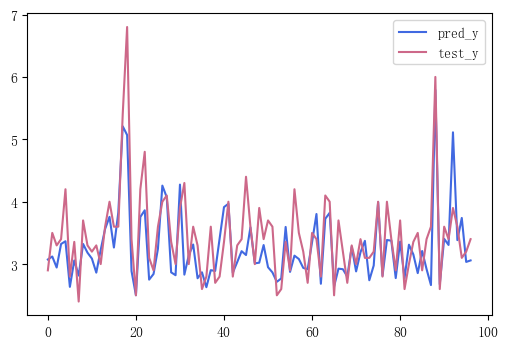

In [125]:
##BP神经网络预测
pred_y1 = model.predict(train_x)
pred_y = model.predict(test_x)
pred_y= np.array(pred_y).reshape(-1,1)
#pred_y = mm_4.inverse_transform(pred_y)#利用上面的归一化结构反归一化

##转化下数据格式(数量, 1)，避免画图出错
pred_y= np.array(pred_y).reshape(-1,1)
test_y= np.array(test_y).reshape(-1,1)

##误差统计指标##
def mape(y_true,y_pre):
    true=y_true[y_true!=0]
    pre=y_pre[y_true!=0]
    mape_ = np.mean(np.abs((pre-true)/true))
    return mape_

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
print("测试的r2",r2_score(test_y,pred_y))
print("测试的mse",mean_squared_error(test_y,pred_y))
rmse = np.sqrt(mean_squared_error(test_y,pred_y))
print("测试的mae",mean_absolute_error(test_y,pred_y))
print('测试的rmse: %.3f'%rmse)
print("测试的mape",mape(test_y,pred_y))


print("训练的r2",r2_score(train_y,pred_y1))
print("训练的mse",mean_squared_error(train_y,pred_y1))
rmse = np.sqrt(mean_squared_error(train_y,pred_y1))
print("训练的mae",mean_absolute_error(train_y,pred_y1))
print('训练的rmse: %.3f'%rmse)
print("训练的mape",mape(train_y,pred_y1))

##绘图展示结果##
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams['font.sans-serif'] = 'SimSun' 
plt.figure(dpi=100)#图片像素
plt.plot(pred_y, color='#4169E1', label='pred_y')
plt.plot(test_y, color='#CD6889', label='test_y')
plt.legend()
plt.show()

测试的r2 0.6269688577349033
测试的mse 0.2761741632921932
测试的mae 0.3709732771341543
测试的rmse: 0.526
测试的mape 0.12302958146721522
训练的r2 0.512396804646224
训练的mse 0.38841188869088544
训练的mae 0.5059170321062265
训练的rmse: 0.623
训练的mape 0.162270217330942


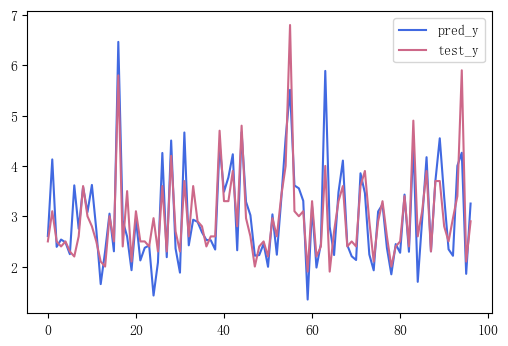

In [91]:
##BP神经网络预测
pred_y1 = model.predict(train_x)
pred_y = model.predict(test_x)
pred_y= np.array(pred_y).reshape(-1,1)
#pred_y = mm_4.inverse_transform(pred_y)#利用上面的归一化结构反归一化

##转化下数据格式(数量, 1)，避免画图出错
pred_y= np.array(pred_y).reshape(-1,1)
test_y= np.array(test_y).reshape(-1,1)

##误差统计指标##
def mape(y_true,y_pre):
    true=y_true[y_true!=0]
    pre=y_pre[y_true!=0]
    mape_ = np.mean(np.abs((pre-true)/true))
    return mape_

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
print("测试的r2",r2_score(test_y,pred_y))
print("测试的mse",mean_squared_error(test_y,pred_y))
rmse = np.sqrt(mean_squared_error(test_y,pred_y))
print("测试的mae",mean_absolute_error(test_y,pred_y))
print('测试的rmse: %.3f'%rmse)
print("测试的mape",mape(test_y,pred_y))


print("训练的r2",r2_score(train_y,pred_y1))
print("训练的mse",mean_squared_error(train_y,pred_y1))
rmse = np.sqrt(mean_squared_error(train_y,pred_y1))
print("训练的mae",mean_absolute_error(train_y,pred_y1))
print('训练的rmse: %.3f'%rmse)
print("训练的mape",mape(train_y,pred_y1))

##绘图展示结果##
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams['font.sans-serif'] = 'SimSun' 
plt.figure(dpi=100)#图片像素
plt.plot(pred_y, color='#4169E1', label='pred_y')
plt.plot(test_y, color='#CD6889', label='test_y')
plt.legend()
plt.show()

测试的r2 0.6318595025072005
测试的mse 0.1963459438127793
测试的mae 0.33219156098216274
测试的rmse: 0.443
测试的mape 0.09608636380668253
训练的r2 0.7273238672036035
训练的mse 0.163444797059349
训练的mae 0.3083207664308405
训练的rmse: 0.404
训练的mape 0.08721593647494866


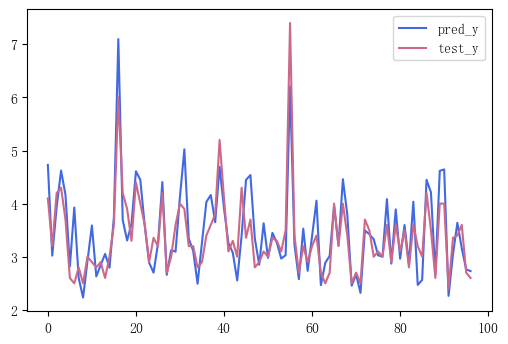

In [69]:
##BP神经网络预测
pred_y1 = model.predict(train_x)
pred_y = model.predict(test_x)
pred_y= np.array(pred_y).reshape(-1,1)
#pred_y = mm_4.inverse_transform(pred_y)#利用上面的归一化结构反归一化

##转化下数据格式(数量, 1)，避免画图出错
pred_y= np.array(pred_y).reshape(-1,1)
test_y= np.array(test_y).reshape(-1,1)

##误差统计指标##
def mape(y_true,y_pre):
    true=y_true[y_true!=0]
    pre=y_pre[y_true!=0]
    mape_ = np.mean(np.abs((pre-true)/true))
    return mape_

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
print("测试的r2",r2_score(test_y,pred_y))
print("测试的mse",mean_squared_error(test_y,pred_y))
rmse = np.sqrt(mean_squared_error(test_y,pred_y))
print("测试的mae",mean_absolute_error(test_y,pred_y))
print('测试的rmse: %.3f'%rmse)
print("测试的mape",mape(test_y,pred_y))


print("训练的r2",r2_score(train_y,pred_y1))
print("训练的mse",mean_squared_error(train_y,pred_y1))
rmse = np.sqrt(mean_squared_error(train_y,pred_y1))
print("训练的mae",mean_absolute_error(train_y,pred_y1))
print('训练的rmse: %.3f'%rmse)
print("训练的mape",mape(train_y,pred_y1))

##绘图展示结果##
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams['font.sans-serif'] = 'SimSun' 
plt.figure(dpi=100)#图片像素
plt.plot(pred_y, color='#4169E1', label='pred_y')
plt.plot(test_y, color='#CD6889', label='test_y')
plt.legend()
plt.show()

测试的r2 0.4704921853763261
测试的mse 0.2824104175622812
测试的mae 0.39940829821647994
测试的rmse: 0.531
测试的mape 0.11643804684138492
训练的r2 0.5716758856365844
训练的mse 0.2567417515783363
训练的mae 0.40642618033737976
训练的rmse: 0.507
训练的mape 0.11462533429815908


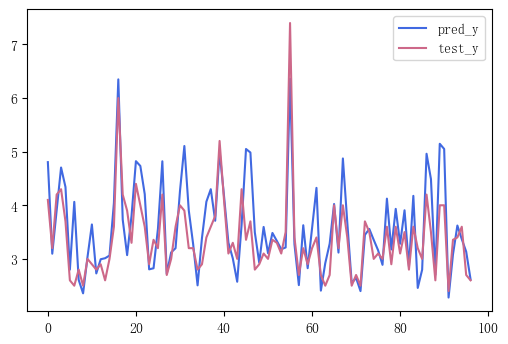

In [73]:
##BP神经网络预测
pred_y1 = model.predict(train_x)
pred_y = model.predict(test_x)
pred_y= np.array(pred_y).reshape(-1,1)
#pred_y = mm_4.inverse_transform(pred_y)#利用上面的归一化结构反归一化

##转化下数据格式(数量, 1)，避免画图出错
pred_y= np.array(pred_y).reshape(-1,1)
test_y= np.array(test_y).reshape(-1,1)

##误差统计指标##
def mape(y_true,y_pre):
    true=y_true[y_true!=0]
    pre=y_pre[y_true!=0]
    mape_ = np.mean(np.abs((pre-true)/true))
    return mape_

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
print("测试的r2",r2_score(test_y,pred_y))
print("测试的mse",mean_squared_error(test_y,pred_y))
rmse = np.sqrt(mean_squared_error(test_y,pred_y))
print("测试的mae",mean_absolute_error(test_y,pred_y))
print('测试的rmse: %.3f'%rmse)
print("测试的mape",mape(test_y,pred_y))


print("训练的r2",r2_score(train_y,pred_y1))
print("训练的mse",mean_squared_error(train_y,pred_y1))
rmse = np.sqrt(mean_squared_error(train_y,pred_y1))
print("训练的mae",mean_absolute_error(train_y,pred_y1))
print('训练的rmse: %.3f'%rmse)
print("训练的mape",mape(train_y,pred_y1))

##绘图展示结果##
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams['font.sans-serif'] = 'SimSun' 
plt.figure(dpi=100)#图片像素
plt.plot(pred_y, color='#4169E1', label='pred_y')
plt.plot(test_y, color='#CD6889', label='test_y')
plt.legend()
plt.show()

测试的r2 0.734893906220381
测试的mse 0.1413930457208028
测试的mae 0.2692989287463861
测试的rmse: 0.376
测试的mape 0.0813433371233244
训练的r2 0.7130110267771813
训练的mse 0.17202405654512953
训练的mae 0.3272236210260605
训练的rmse: 0.415
训练的mape 0.09257997982925695


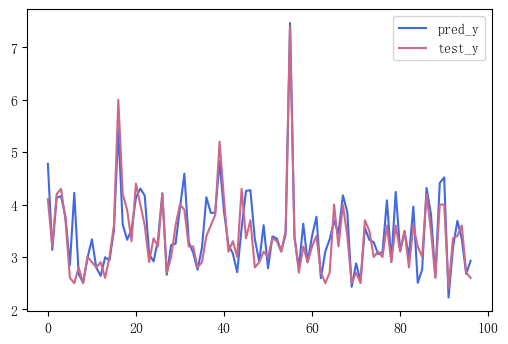

In [78]:
##BP神经网络预测
pred_y1 = model.predict(train_x)
pred_y = model.predict(test_x)
pred_y= np.array(pred_y).reshape(-1,1)
#pred_y = mm_4.inverse_transform(pred_y)#利用上面的归一化结构反归一化

##转化下数据格式(数量, 1)，避免画图出错
pred_y= np.array(pred_y).reshape(-1,1)
test_y= np.array(test_y).reshape(-1,1)

##误差统计指标##
def mape(y_true,y_pre):
    true=y_true[y_true!=0]
    pre=y_pre[y_true!=0]
    mape_ = np.mean(np.abs((pre-true)/true))
    return mape_

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
print("测试的r2",r2_score(test_y,pred_y))
print("测试的mse",mean_squared_error(test_y,pred_y))
rmse = np.sqrt(mean_squared_error(test_y,pred_y))
print("测试的mae",mean_absolute_error(test_y,pred_y))
print('测试的rmse: %.3f'%rmse)
print("测试的mape",mape(test_y,pred_y))


print("训练的r2",r2_score(train_y,pred_y1))
print("训练的mse",mean_squared_error(train_y,pred_y1))
rmse = np.sqrt(mean_squared_error(train_y,pred_y1))
print("训练的mae",mean_absolute_error(train_y,pred_y1))
print('训练的rmse: %.3f'%rmse)
print("训练的mape",mape(train_y,pred_y1))

##绘图展示结果##
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams['font.sans-serif'] = 'SimSun' 
plt.figure(dpi=100)#图片像素
plt.plot(pred_y, color='#4169E1', label='pred_y')
plt.plot(test_y, color='#CD6889', label='test_y')
plt.legend()
plt.show()

测试的r2 0.6476071822094684
测试的mse 0.18794699543556737
测试的mae 0.30685913585012126
测试的rmse: 0.434
测试的mape 0.09007339534325094
训练的r2 0.7598612243447698
训练的mse 0.1439415802568854
训练的mae 0.28186751164078744
训练的rmse: 0.379
训练的mape 0.08035841413061709


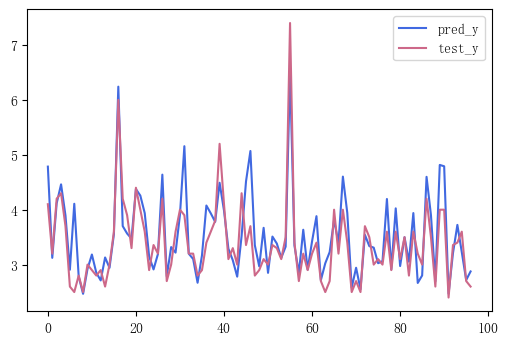

In [83]:
##BP神经网络预测
pred_y1 = model.predict(train_x)
pred_y = model.predict(test_x)
pred_y= np.array(pred_y).reshape(-1,1)
#pred_y = mm_4.inverse_transform(pred_y)#利用上面的归一化结构反归一化

##转化下数据格式(数量, 1)，避免画图出错
pred_y= np.array(pred_y).reshape(-1,1)
test_y= np.array(test_y).reshape(-1,1)

##误差统计指标##
def mape(y_true,y_pre):
    true=y_true[y_true!=0]
    pre=y_pre[y_true!=0]
    mape_ = np.mean(np.abs((pre-true)/true))
    return mape_

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
print("测试的r2",r2_score(test_y,pred_y))
print("测试的mse",mean_squared_error(test_y,pred_y))
rmse = np.sqrt(mean_squared_error(test_y,pred_y))
print("测试的mae",mean_absolute_error(test_y,pred_y))
print('测试的rmse: %.3f'%rmse)
print("测试的mape",mape(test_y,pred_y))


print("训练的r2",r2_score(train_y,pred_y1))
print("训练的mse",mean_squared_error(train_y,pred_y1))
rmse = np.sqrt(mean_squared_error(train_y,pred_y1))
print("训练的mae",mean_absolute_error(train_y,pred_y1))
print('训练的rmse: %.3f'%rmse)
print("训练的mape",mape(train_y,pred_y1))

##绘图展示结果##
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams['font.sans-serif'] = 'SimSun' 
plt.figure(dpi=100)#图片像素
plt.plot(pred_y, color='#4169E1', label='pred_y')
plt.plot(test_y, color='#CD6889', label='test_y')
plt.legend()
plt.show()